# Problem statement

1) Prepare a classification model using Naive Bayes 
for salary data 

Data Description:

age -- age of a person  
workclass	-- A work class is a grouping of work   
education	-- Education of an individuals	  
maritalstatus -- Marital status of an individulas	  
occupation	 -- occupation of an individuals  
relationship -- 	 
race --  Race of an Individual  
sex --  Gender of an Individual  
capitalgain --  profit received from the sale of an investment	  
capitalloss	-- A decrease in the value of a capital asset  
hoursperweek -- number of hours work per week 
native -- Native of an individual  
Salary -- salary of an individual  


In [1]:
# IMPORT THE LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import the training data set
df_train=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 17- NAIVE BAYES/SalaryData_Train.csv")
df_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# import the testing data set
df_test=pd.read_csv("C:/Users/hp/Desktop/DATA SCIENCE COURSE/ASSIGNMENT/ASSIGNMENT 17- NAIVE BAYES/SalaryData_Test.csv")
df_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
df=df_train.append(df_test)
df.reset_index(inplace=True)
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_16476\4238370071.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df=df_train.append(df_test)


,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df_train.shape

(30161, 14)

In [6]:
df_test.shape

(15060, 14)

In [7]:
df.shape

(45221, 15)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   index          45221 non-null  int64 
 1   age            45221 non-null  int64 
 2   workclass      45221 non-null  object
 3   education      45221 non-null  object
 4   educationno    45221 non-null  int64 
 5   maritalstatus  45221 non-null  object
 6   occupation     45221 non-null  object
 7   relationship   45221 non-null  object
 8   race           45221 non-null  object
 9   sex            45221 non-null  object
 10  capitalgain    45221 non-null  int64 
 11  capitalloss    45221 non-null  int64 
 12  hoursperweek   45221 non-null  int64 
 13  native         45221 non-null  object
 14  Salary         45221 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.2+ MB


In [11]:
df.describe()

,index,age,educationno,capitalgain,capitalloss,hoursperweek
count,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000,45221.000000
mean,12565.448575,38.548086,10.118463,1101.454700,88.548617,40.938038
std,8337.871072,13.217981,2.552909,7506.511295,404.838249,12.007640
min,0.000000,17.000000,1.000000,0.000000,0.000000,1.000000
25%,5652.000000,28.000000,9.000000,0.000000,0.000000,40.000000
50%,11305.000000,37.000000,10.000000,0.000000,0.000000,40.000000
75%,18855.000000,47.000000,13.000000,0.000000,0.000000,45.000000
max,30160.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
df.isnull().sum()

index            0
age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

No missing values present in data set

In [13]:
df[df.duplicated()]

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary


No duplicates rows are present

# EDA

In [14]:
df.head()

,index,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [15]:
# dropping the index feature
df.drop('index',axis=1, inplace=True)
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
45217,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
45218,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
45219,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


age                AxesSubplot(0.125,0.657941;0.168478x0.222059)
educationno     AxesSubplot(0.327174,0.657941;0.168478x0.222059)
hoursperweek    AxesSubplot(0.529348,0.657941;0.168478x0.222059)
dtype: object

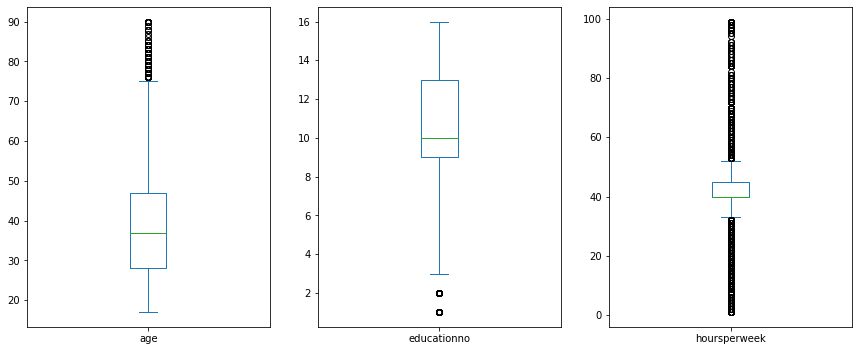

In [16]:
# plotting boxplot for outlier detection
df[['age','educationno','hoursperweek']].plot(kind='box',subplots=True,layout=(3,4),figsize=(20,20))

Too many outlier are present in data ,but we cannot drop this data as it will have effect on trainning and testing model

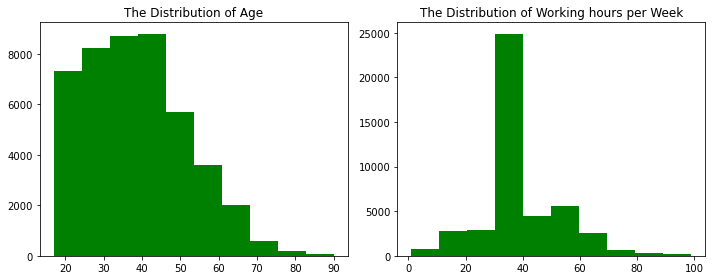

In [17]:
# plotting the histogram for age and no of hours
histogram = plt.figure(figsize = (10,4))

hist1 = histogram.add_subplot(1,2,1) 
hist2 = histogram.add_subplot(1,2,2)

hist1.hist(df['age'],color = 'green')
hist1.set_title('The Distribution of Age')

hist2.hist(df['hoursperweek'], color = 'green')
hist2.set_title('The Distribution of Working hours per Week')

plt.tight_layout() 
plt.show()

### Observatios:  
A: Distribution of age  
1. age is distributes  from around 17 to 90 year, and the data is showing the more age of people in range of 17 to 45 year    

B:Distribution of no of hour per week  
1. more no of people's working hour is between 30 to 40 hours

In [18]:
df.Salary.value_counts()

 <=50K    34013
 >50K     11208
Name: Salary, dtype: int64

More no of people having less than 50K salary

# lets see how the numerical data affects the salary??

In [19]:
# age Vs Salary
df1 = pd.DataFrame()
df1['age_wrt_salary_more_than_50k'] = (df[df['Salary'] == ' <=50K'][['Salary','age']].describe())['age']
df1['age_wrt_salary_less_than_50k'] = (df[df['Salary'] == ' >50K'][['Salary','age']].describe())['age']

df1

,age_wrt_salary_more_than_50k,age_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,36.749566,44.006067
std,13.564858,10.340502
min,17.000000,19.000000
25%,26.000000,36.000000
50%,34.000000,43.000000
75%,46.000000,51.000000
max,90.000000,90.000000


<AxesSubplot:>

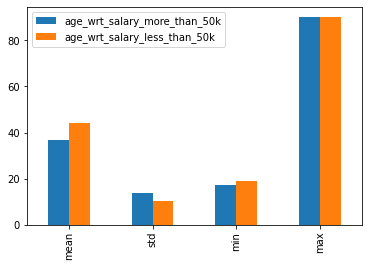

In [20]:
df1.drop(['count', '25%', '50%', '75%']).plot.bar()

In [21]:
# capital gain Vs Salary
df2 = pd.DataFrame()
df2['capitalgain_wrt_salary_more_than_50k'] = (df[df['Salary'] == ' <=50K'][['Salary','capitalgain']].describe())['capitalgain']
df2['capitalgain_wrt_salary_less_than_50k'] = (df[df['Salary'] == ' >50K'][['Salary','capitalgain']].describe())['capitalgain']

df2

,capitalgain_wrt_salary_more_than_50k,capitalgain_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,149.027783,3991.791667
std,927.460669,14616.543746
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,41310.000000,99999.000000


<AxesSubplot:>

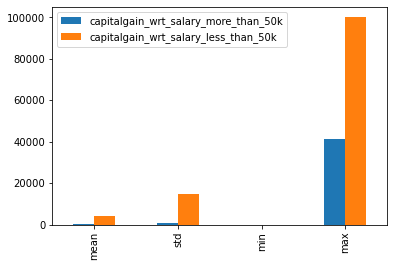

In [22]:
df2.drop(['count', '25%', '50%', '75%']).plot.bar()

Capital loss is higher for person having less than 50 k salary

In [23]:
# capital loss Vs Salary
df3 = pd.DataFrame()
df3['capitalloss_wrt_salary_more_than_50k'] = (df[df['Salary'] == ' <=50K'][['Salary','capitalloss']].describe())['capitalloss']
df3['capitalloss_wrt_salary_less_than_50k'] = (df[df['Salary'] == ' >50K'][['Salary','capitalloss']].describe())['capitalloss']

df3

,capitalloss_wrt_salary_more_than_50k,capitalloss_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,53.969188,193.487063
std,312.007128,592.642319
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,4356.000000,3683.000000


<AxesSubplot:>

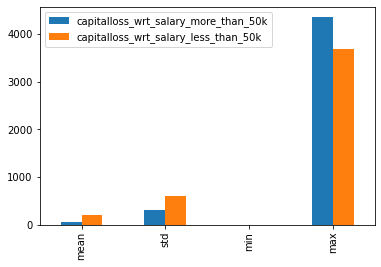

In [24]:
df3.drop(['count', '25%', '50%', '75%']).plot.bar()

In [25]:
# hourperweek Vs Salary
df4 = pd.DataFrame()
df4['hoursperweek_wrt_salary_more_than_50k'] = (df[df['Salary'] == ' <=50K'][['Salary','hoursperweek']].describe())['hoursperweek']
df4['hoursperweek_wrt_salary_less_than_50k'] = (df[df['Salary'] == ' >50K'][['Salary','hoursperweek']].describe())['hoursperweek']

df4

,hoursperweek_wrt_salary_more_than_50k,hoursperweek_wrt_salary_less_than_50k
count,34013.000000,11208.000000
mean,39.372005,45.690489
std,11.974303,10.797764
min,1.000000,1.000000
25%,37.000000,40.000000
50%,40.000000,40.000000
75%,40.000000,50.000000
max,99.000000,99.000000


<AxesSubplot:>

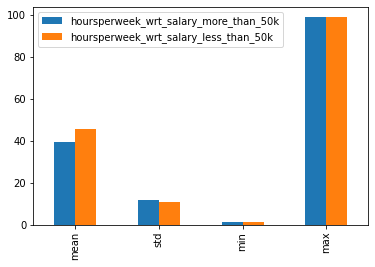

In [26]:
df4.drop(['count', '25%', '50%', '75%']).plot.bar()

average working hours are same for both person more than 50k and less than 50k

In [27]:
for feature in df.columns:
    if df[feature].dtypes == 'object':# in pandas it is object
        unique_cat = len(df[feature].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=feature, unique_cat=unique_cat))
        print(df[feature].value_counts())
        print()

Feature 'workclass' has 7 unique categories
 Private             33306
 Self-emp-not-inc     3796
 Local-gov            3100
 State-gov            1946
 Self-emp-inc         1646
 Federal-gov          1406
 Without-pay            21
Name: workclass, dtype: int64

Feature 'education' has 16 unique categories
 HS-grad         14783
 Some-college     9898
 Bachelors        7570
 Masters          2514
 Assoc-voc        1959
 11th             1619
 Assoc-acdm       1507
 10th             1223
 7th-8th           823
 Prof-school       785
 9th               676
 12th              577
 Doctorate         544
 5th-6th           449
 1st-4th           222
 Preschool          72
Name: education, dtype: int64

Feature 'maritalstatus' has 7 unique categories
 Married-civ-spouse       21055
 Never-married            14597
 Divorced                  6297
 Separated                 1411
 Widowed                   1277
 Married-spouse-absent      552
 Married-AF-spouse           32
Name: maritalstatus,

# visualization of categorical features

Text(0.5, 1.0, 'Working Class')

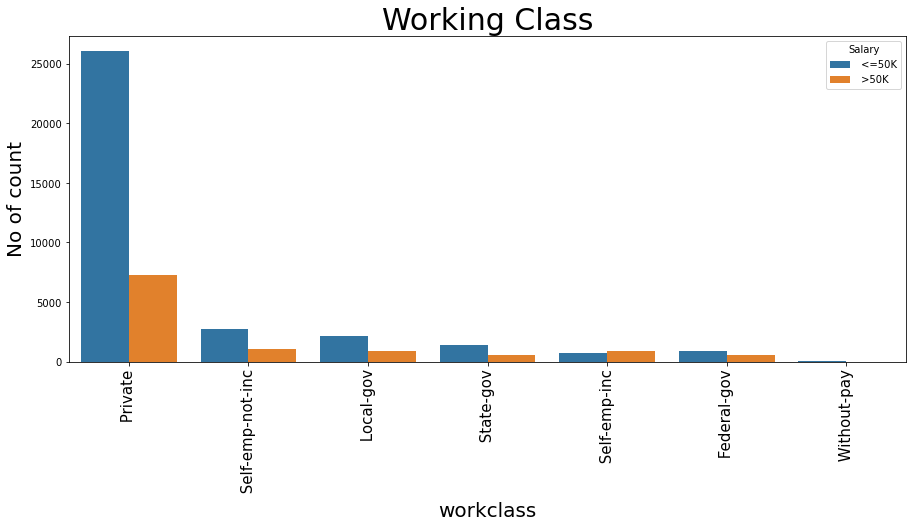

In [28]:
# barplot workplace

plt.rcParams['figure.figsize']=[15,6]
sns.countplot(x='workclass',data=df,hue='Salary',order=df['workclass'].value_counts().index)
plt.xticks(rotation = 90,fontsize = 15)
plt.xlabel('workclass',fontsize=20)
plt.ylabel('No of count',fontsize=20)
plt.title('Working Class',fontsize = 30)

Text(0.5, 1.0, 'education')

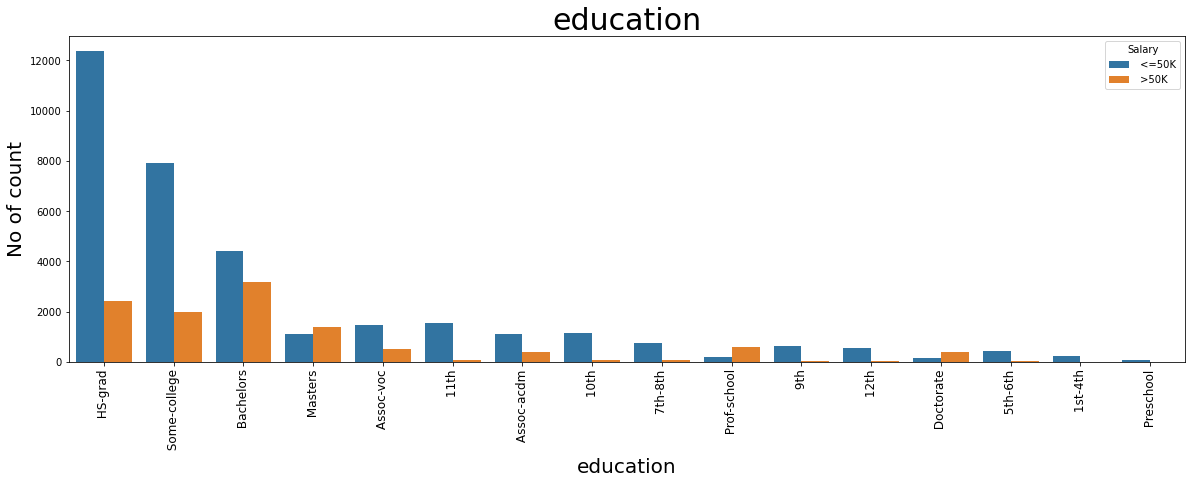

In [29]:
# barplot education

plt.rcParams['figure.figsize']=[20,6]
sns.countplot(x='education',data=df,hue='Salary',order=df['education'].value_counts().index)
plt.xticks(rotation = 90,fontsize = 12)
plt.xlabel('education',fontsize=20)
plt.ylabel('No of count',fontsize=20)
plt.title('education',fontsize = 30)

Text(0.5, 1.0, 'maritalstatus')

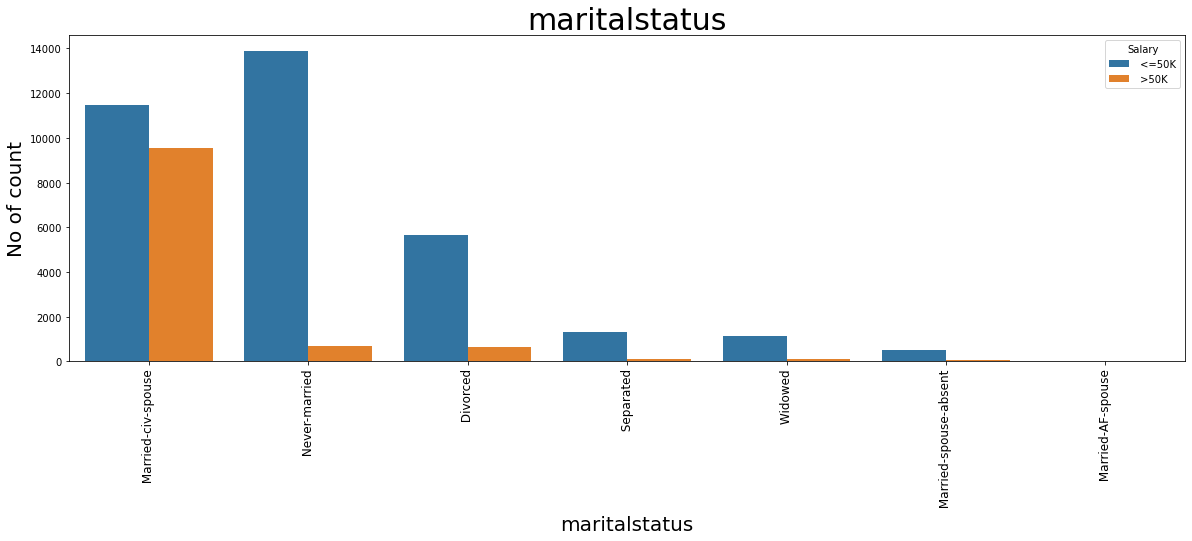

In [30]:
# barplot maritalstatus
sns.countplot(x='maritalstatus',data=df,hue='Salary',order=df['maritalstatus'].value_counts().index)
plt.xticks(rotation = 90,fontsize = 12)
plt.xlabel('maritalstatus',fontsize=20)
plt.ylabel('No of count',fontsize=20)
plt.title('maritalstatus',fontsize = 30)

Text(0.5, 1.0, 'occupation')

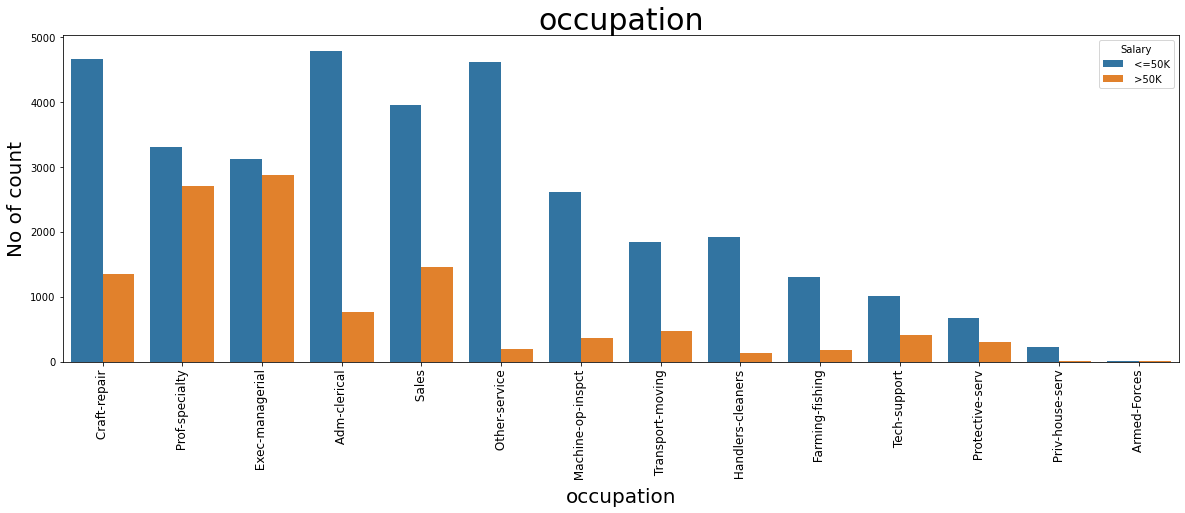

In [31]:
# barplot maritalstatus
sns.countplot(x='occupation',data=df,hue='Salary',order=df['occupation'].value_counts().index)
plt.xticks(rotation = 90,fontsize = 12)
plt.xlabel('occupation',fontsize=20)
plt.ylabel('No of count',fontsize=20)
plt.title('occupation',fontsize = 30)

Text(0.5, 1.0, 'relationship')

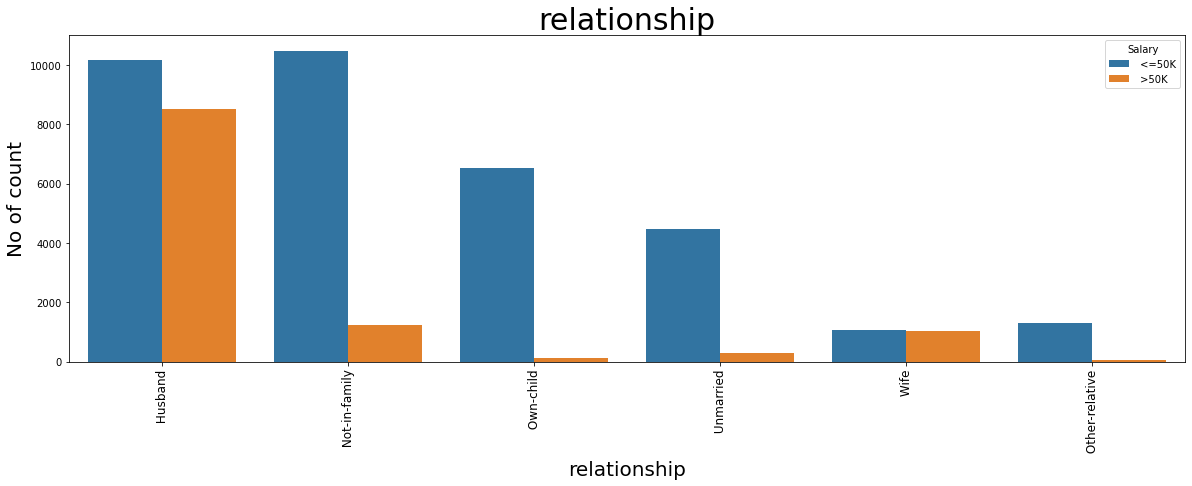

In [32]:
# barplot maritalstatus
sns.countplot(x='relationship',data=df,hue='Salary',order=df['relationship'].value_counts().index)
plt.xticks(rotation = 90,fontsize = 12)
plt.xlabel('relationship',fontsize=20)
plt.ylabel('No of count',fontsize=20)
plt.title('relationship',fontsize = 30)

Text(0.5, 1.0, 'race')

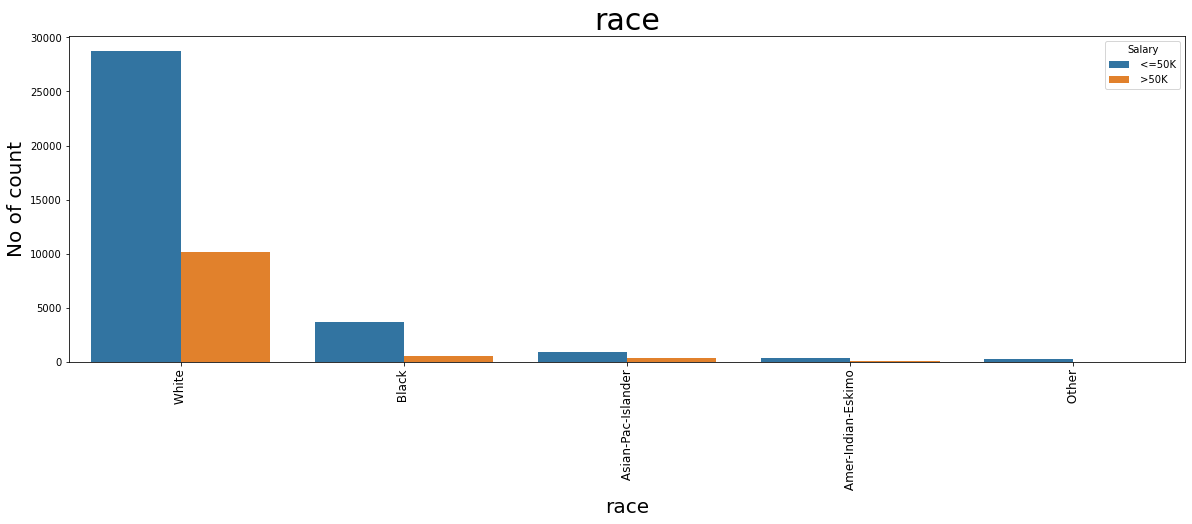

In [33]:
# barplot maritalstatus
sns.countplot(x='race',data=df,hue='Salary',order=df['race'].value_counts().index)
plt.xticks(rotation = 90,fontsize = 12)
plt.xlabel('race',fontsize=20)
plt.ylabel('No of count',fontsize=20)
plt.title('race',fontsize = 30)

Text(0.5, 1.0, 'sex')

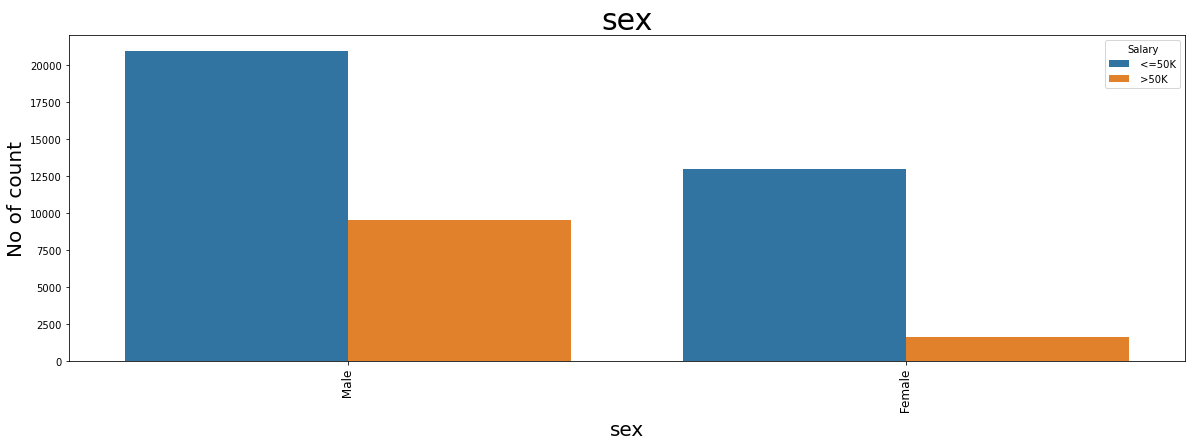

In [34]:
# barplot sex
sns.countplot(x='sex',data=df,hue='Salary',order=df['sex'].value_counts().index)
plt.xticks(rotation = 90,fontsize = 12)
plt.xlabel('sex',fontsize=20)
plt.ylabel('No of count',fontsize=20)
plt.title('sex',fontsize = 30)

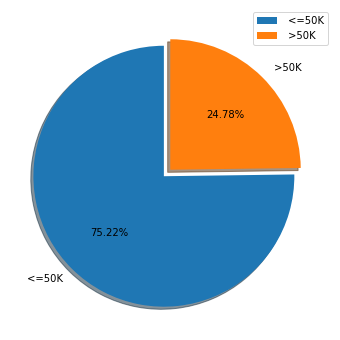

In [35]:
# ploting the pie chart for target variable Salary
salary_labels=df.Salary.value_counts().index
val=df.Salary.value_counts().values
plt.pie(x=val,labels=salary_labels,autopct='%1.2f%%',shadow=True,startangle=90,\
        explode=[0.07,0.0])
plt.legend(loc='upper right')

Around 75.22% employees having the salary less than 50k
which is showing our target variable data is imbalance.problem with thw imbalance data is prediction will be biased. it will give more prediction of majority class.


([<matplotlib.patches.Wedge at 0x27920d2e700>,
 [Text(-1.0957711302530042, 0.0963619743677652, ' United-States'),
  Text(1.0935144146357278, -0.11927373970779072, ' Mexico'),
  Text(1.0997590741180112, -0.023021270492629996, ' Philippines')],
 [Text(-0.5976933437743659, 0.052561076927871916, '97.21%'),
  Text(0.5964624079831242, -0.06505840347697675, '2.13%'),
  Text(0.5998685858825515, -0.012557056632343633, '0.67%')])

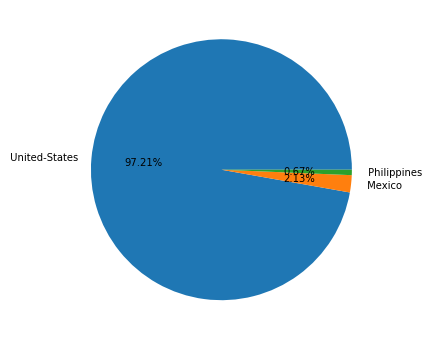

In [37]:
native_name=df.native.value_counts().index
native_value=df.native.value_counts().values
plt.pie(x=native_value[0:3],labels=native_name[0:3],autopct='%1.2f%%')

97.21 % of the employees are from US.

# HANDING THE CATEGORICAL FEATURES

We can use label encoder for categorical feature as one hot encoding will create too many features.


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45221 entries, 0 to 45220
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            45221 non-null  int64 
 1   workclass      45221 non-null  object
 2   education      45221 non-null  object
 3   educationno    45221 non-null  int64 
 4   maritalstatus  45221 non-null  object
 5   occupation     45221 non-null  object
 6   relationship   45221 non-null  object
 7   race           45221 non-null  object
 8   sex            45221 non-null  object
 9   capitalgain    45221 non-null  int64 
 10  capitalloss    45221 non-null  int64 
 11  hoursperweek   45221 non-null  int64 
 12  native         45221 non-null  object
 13  Salary         45221 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.8+ MB


In [39]:
df.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [40]:
categorical_features=[ 'workclass', 'education', 'maritalstatus','occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

In [43]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()

In [45]:
for i in categorical_features:
    df[i]=LB.fit_transform(df[i])
df.head(10)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
5,37,2,12,14,2,3,5,4,0,0,0,40,37,0
6,49,2,6,5,3,7,1,2,0,0,0,16,21,0
7,52,4,11,9,2,3,0,4,1,0,0,45,37,1
8,31,2,12,14,4,9,1,4,0,14084,0,50,37,1
9,42,2,9,13,2,3,0,4,1,5178,0,40,37,1


In [49]:
df.Salary.value_counts()

0    34013
1    11208
Name: Salary, dtype: int64

In [53]:
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45216,33,2,9,13,4,9,3,4,1,0,0,40,37,0
45217,39,2,9,13,0,9,1,4,0,0,0,36,37,0
45218,38,2,9,13,2,9,0,4,1,0,0,50,37,0
45219,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [55]:
x=df.drop('Salary',axis=1)

In [56]:
x.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4


In [80]:
y=df['Salary']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Salary, dtype: int32

 # Sampling Technique
 We can do train test splittig by using random sampling or othe we can do by stratify sampling.


## 1. Random Sampling

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

In [84]:
from collections import  Counter
counter_train=Counter(y_train)
counter_test=Counter(y_test)
print('Trainnig data',counter_train,'Testing data',counter_test)

Trainnig data Counter({0: 23809, 1: 7845}) Testing data Counter({0: 10204, 1: 3363})


##  grid serach on train test split data on imbalance data.

In [115]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,\
f1_score,recall_score,roc_auc_score,roc_curve

In [116]:
def print_score(model, x_train,  x_test,y_train, y_test, train=True):
    if train:
        pred = model.predict(x_train)
        model_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{model_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = model.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [117]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(x_train,y_train)
print_score(MNB,x_train,x_test,y_train,y_test,train=True)
print_score(MNB,x_train,x_test,y_train,y_test,train=False)

Train Result:
Accuracy Score: 77.41%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.787214     0.630984   0.77412      0.709099      0.748495
recall         0.958881     0.213384   0.77412      0.586133      0.774120
f1-score       0.864609     0.318918   0.77412      0.591763      0.729367
support    23809.000000  7845.000000   0.77412  31654.000000  31654.000000
_______________________________________________
Confusion Matrix: 
 [[22830   979]
 [ 6171  1674]]

Test Result:
Accuracy Score: 77.24%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.786013     0.622005  0.772389      0.704009      0.745359
recall         0.958252     0.208445  0.772389      0.583348      0.772389
f1-score       0.863628     0.312249  0.772389      0.587939      0.726952
support   

In [118]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(x_train,y_train)
print_score(GNB,x_train,x_test,y_train,y_test,train=True)
print_score(GNB,x_train,x_test,y_train,y_test,train=False)

Train Result:
Accuracy Score: 79.53%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.810939     0.679947  0.795255      0.745443      0.778474
recall         0.949053     0.328489  0.795255      0.638771      0.795255
f1-score       0.874577     0.442974  0.795255      0.658775      0.767610
support    23809.000000  7845.000000  0.795255  31654.000000  31654.000000
_______________________________________________
Confusion Matrix: 
 [[22596  1213]
 [ 5268  2577]]

Test Result:
Accuracy Score: 79.51%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.810264     0.681847  0.795091      0.746055      0.778432
recall         0.950020     0.325007  0.795091      0.637514      0.795091
f1-score       0.874594     0.440193  0.795091      0.657394      0.766914
support   

In [119]:
from sklearn.naive_bayes import CategoricalNB
CNB=CategoricalNB()
CNB.fit(x_train,y_train)
print_score(CNB,x_train,x_test,y_train,y_test,train=True)
print_score(CNB,x_train,x_test,y_train,y_test,train=False)

Train Result:
Accuracy Score: 85.70%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.890830     0.737475  0.856985      0.814153      0.852823
recall         0.922970     0.656724  0.856985      0.789847      0.856985
f1-score       0.906616     0.694761  0.856985      0.800688      0.854110
support    23809.000000  7845.000000  0.856985  31654.000000  31654.000000
_______________________________________________
Confusion Matrix: 
 [[21975  1834]
 [ 2693  5152]]

Test Result:
Accuracy Score: 85.77%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.890789     0.740107  0.857669      0.815448      0.853438
recall         0.924049     0.656259  0.857669      0.790154      0.857669
f1-score       0.907114     0.695666  0.857669      0.801390      0.854700
support   

# Summery:
1. in  Random train_test_split we calculated acuuracy score for multinomial, gaussian , and categorical model
2. we find Categorical NB gives us mode accuracy score

## Now we will use stratified sampling technique for splitting the train test data

In [125]:
from sklearn.model_selection import KFold,GridSearchCV,StratifiedKFold,RandomizedSearchCV

    # Create StratifiedKFold object.
skf =StratifiedKFold(n_splits=10,shuffle=True,random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix] 

In [128]:
from sklearn.naive_bayes import MultinomialNB
MNB=MultinomialNB()
MNB.fit(train_X,train_y)
print_score(MNB,train_X,test_X,train_y,test_y,train=True)
print_score(MNB,train_X,test_X,train_y,test_y,train=False)

Train Result:
Accuracy Score: 77.33%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.786608      0.626769  0.773287      0.706689      0.746993
recall         0.958644      0.210766  0.773287      0.584705      0.773287
f1-score       0.864147      0.315454  0.773287      0.589800      0.728157
support    30612.000000  10087.000000  0.773287  40699.000000  40699.000000
_______________________________________________
Confusion Matrix: 
 [[29346  1266]
 [ 7961  2126]]

Test Result:
Accuracy Score: 77.64%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.789066     0.641753  0.776426     0.715409      0.752547
recall        0.959130     0.222123  0.776426     0.590626      0.776426
f1-score      0.865826     0.330020  0.776426     0.597923      0.733000
support    34

In [130]:
from sklearn.naive_bayes import GaussianNB
GNB=GaussianNB()
GNB.fit(train_X,train_y)
print_score(GNB,train_X,test_X,train_y,test_y,train=True)
print_score(GNB,train_X,test_X,train_y,test_y,train=False)

Train Result:
Accuracy Score: 79.45%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.810305      0.677453  0.794467      0.743879      0.777378
recall         0.948876      0.325865  0.794467      0.637371      0.794467
f1-score       0.874133      0.440056  0.794467      0.657095      0.766550
support    30612.000000  10087.000000  0.794467  40699.000000  40699.000000
_______________________________________________
Confusion Matrix: 
 [[29047  1565]
 [ 6800  3287]]

Test Result:
Accuracy Score: 79.99%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.814358     0.695652  0.799867     0.755005      0.784931
recall        0.950603     0.342551  0.799867     0.646577      0.799867
f1-score      0.877222     0.459056  0.799867     0.668139      0.773559
support    34

In [131]:
from sklearn.naive_bayes import CategoricalNB
CNB=CategoricalNB()
CNB.fit(train_X,train_y)
print_score(CNB,train_X,test_X,train_y,test_y,train=True)
print_score(CNB,train_X,test_X,train_y,test_y,train=False)

Train Result:
Accuracy Score: 85.69%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.893832      0.730878  0.856876      0.812355      0.853445
recall         0.918855      0.668782  0.856876      0.793818      0.856876
f1-score       0.906171      0.698452  0.856876      0.802312      0.854689
support    30612.000000  10087.000000  0.856876  40699.000000  40699.000000
_______________________________________________
Confusion Matrix: 
 [[28128  2484]
 [ 3341  6746]]

Test Result:
Accuracy Score: 85.85%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.895899     0.732367   0.85847     0.814133      0.855360
recall        0.918553     0.676182   0.85847     0.797368      0.858470
f1-score      0.907085     0.703154   0.85847     0.805119      0.856531
support    34

# Summery:
1. We used stratified sampling technique here instead of random sampling
2. We got accuracy result better than random sampling.
3. we found that categoriacal NB give more accuracy score as compare to other.

## Conclusion & Cross Validation
Categorical Model has a better Accuracy, Thus we will use Categorical Classifier
We will also cross validate the model with other classifiers to get better understanding of which classifier is best suited for our data

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection

In [161]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))

In [162]:
results = []
names = []
scoring = 'accuracy'

In [163]:
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, train_X, train_y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LR: 0.801936 (0.002980)
KNN: 0.836802 (0.004793)
CART: 0.816482 (0.005285)


# CategoricalNB model has better accuracy 85% as comparedto other model.